# Explore will School's education quality affect future Crime Rate


# Project One 

## Introducation

In the effort to unravel the complex relationship between the quality of education and crime rates across the United States, this research conducts a thorough analysis, tackling the obstacles created by the lack of specific annual data for schools. Given the logistical ease of mapping and the wider availability of state-level data, the study expands beyond basic statistics to discover patterns and connections that could illuminate the grasp of public safety and the significance of education.

At the core of the examination, the crime rate in each state acts as an indicator of safety and well-being. This key variable, contrasted with a range of independent factors—from crime types (split into fatal and nonfatal) and school types (private versus public), to the intricacies of student-to-school ratios and economic metrics like GDP per capita and spending per student—provides a rich view of the socio-economic environment(Burdick-Will, 2013).

Investigating these links, especially the impact of student-to-school ratios on educational quality and their association with crime data, aims to highlight a possible connection between education levels and crime occurrences(Burdick-Will, 2013). This careful analysis recognizes that merely counting schools within a state offers an incomplete picture. Instead, it's the combination of demographic and economic factors, such as GDP per capita and investment in students, that truly informs the understanding(Cook et al. (2010).

Additionally, the study utilizes web scraping to collect information on K-12 education spending per student from a site recommended by experts, offering greater depth to the assessment of educational funding across states(Ramirez et al., 2011). Navigating the complexities of web data to extract relevant information presents its own set of challenges, demanding accurate and focused efforts to ensure the data's relevance and usefulness.

The results, illustrated through various visual aids and maps, underscore the relationship between the quality of education—measured by expenditure per student—and crime rates. Applying color codes to map states by their 'value' ratio (the balance of school availability to crime rates) constructs a persuasive story, reinforcing the theory of a link between educational standards and crime levels(McCall et al., 2012).

This introduction prepares the ground for a detailed exploration of how educational systems and public safety interconnect across the United States. With this research, the venture is to comprehend the wider effects of investment in education and its capability to improve community welfare. I think this research is meaningful.

### set up the varibale

#### <span style="color:red">Due to the original dataset not providing the start and end years for schools, I couldn't analyze the increasing rates of crime and school data. Instead, I focused on comparing patterns across different states. I chose to work with state-level data because it's more feasible to map all states than to map counties or zip codes. Moreover, state-level data tends to be more readily available, supporting my research with ample information. However, obtaining data for counties or zip codes presents more challenges.

In this study, the dependent variable (Y) is the crime rate in each state, which reflects the safety level of the state. Finding some interesting fact about Y is meaningful and can improve all citizens's welfare

The independent variables (X) include:

Type of Crime Rate: I've categorized crime rates into fatal and nonfatal to investigate their relationships with school types and populations.

Type of School: By differentiating between private and public schools, I aim to explore if there's a notable difference in how each type influences local crime rates.

Population Per School in Each State: Merely comparing the number of schools in each state doesn't provide a complete picture. A state's population and area size can significantly influence the number of schools it has. For instance, comparing a state with 1000 people and 2 schools to another with only 1 person and 1 school doesn't directly reveal the impact of schools on crime rates.

GDP Per Capita: I also consider GDP per capita to ensure comparisons between states of similar economic statuses, as states with lower GDP per capita might have higher crime rates.

Total Average Spent Per Pupil: This variable indicates the quality of a school's education. I plan to web scrape this data to analyze its correlation with crime rates, although my primary focus will remain on the population per school in each state.

This multifaceted approach allows for a more nuanced understanding of the factors affecting crime rates across different states, emphasizing the importance of considering both educational and economic contexts.

## Merge other datasets

#### I have merged the each state's crime rate data (TAS, 2022) and each state's population data (VIKAS, 2018). 
US State populations - 2018. Www.kaggle.com. https://www.kaggle.com/datasets/lucasvictor/us-state-populations-2018)
TAS, N. (2022, January 1). United States Crime. Www.kaggle.com. https://www.kaggle.com/datasets/nuritasthedataist/united-states-crime

VIKAS. (2018, January 1). US State populations - 2018. Www.kaggle.com. https://www.kaggle.com/datasets/lucasvictor/us-state-populations-2018

In [7]:
import pandas as pd
# Load the datasets
crime = pd.read_csv('state_crime.csv')

## Data Cleaning/Loading

#### clean data first, remove some useless columns, then get number of private school and public school in each state.

In [8]:
import pandas as pd
# Load the datasets
private_data = pd.read_csv('Private_Schools.csv')
public_data = pd.read_csv('Public_Schools.csv')

private_filtered = private_data[(private_data['FT_TEACHER'] > 0) & (private_data['ENROLLMENT'] > 0)].copy()
public_filtered = public_data[(public_data['FT_TEACHER'] > 0) & (public_data['ENROLLMENT'] > 0)].copy()

# Safely calculate the student per teacher ratio using .loc
private_filtered.loc[:, 'PTR'] = private_filtered['ENROLLMENT'] / private_filtered['FT_TEACHER']
public_filtered.loc[:, 'PTR'] = public_filtered['ENROLLMENT'] / public_filtered['FT_TEACHER']

# Proceed with the rest of the calculations
avg_private_spt_state = private_filtered.groupby('STATE')['PTR'].mean().reset_index(name='Private_PTR')
avg_public_spt_state = public_filtered.groupby('STATE')['PTR'].mean().reset_index(name='Public_PTR')

# Merge and fill missing values
ptr_state = pd.merge(avg_private_spt_state, avg_public_spt_state, on='STATE', how='outer')
ptr_state.fillna(0, inplace=True)

In [9]:
# State abbreviations dictionary
state_abbreviations = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY',
    'District of Columbia': 'DC', 'American Samoa': 'AS', 'Guam': 'GU',
    'Northern Mariana Islands': 'MP', 'Puerto Rico': 'PR', 'U.S. Virgin Islands': 'VI'
}
# Filter the data for the year 2018 and select only the relevant columns
crime_2018 = crime[crime['Year'] == 2018][['STATE', 'Data.Rates.Property.All', 'Data.Rates.Violent.All']].copy()
# Rename the columns for property and violent crime rates and the State column to abbreviations
crime_2018.rename(columns={
    'Data.Rates.Property.All': 'nonfatal crime rate',  # New name for Property Crime Rate
    'Data.Rates.Violent.All': 'fatal crime rate'       # New name for Violent Crime Rate
}, inplace=True)
# Replace full state names with abbreviations using the state_abbreviations dictionary
crime_2018['STATE'] = crime_2018['STATE'].map(state_abbreviations)
# Drop any rows that didn't match the state abbreviations (i.e., if any 'State' is NaN)
crime_2018.dropna(subset=['STATE'], inplace=True)

## Summary Statistics Tables

These two summary tables show the proportion of one state's population per public/private school among all states'population per public/private school. Only show a numeric cannot reflect the population per school is high or low. Same as crime rate in each state. we cannot only look at number to know this state's crime rate is high or low. (Interpretation): in the following, I can use these two data to compare. If most of the state has high population per school(bad school quality) with high crime rate or low population per school(good school quality) with low crime rate. This will reflect an correlation and it is related to our research topic.

In [10]:
ptr_state.head(10)

,STATE,Private_PTR,Public_PTR
0,AK,8.365722,17.486594
1,AL,9.845521,18.716610
2,AR,8.825261,13.669028
3,AZ,9.984455,18.458963
4,CA,10.683620,22.828242
5,CO,9.252550,17.765638
6,CT,8.040260,13.790649
7,DC,7.661476,16.232906
8,DE,10.165393,15.092346
9,FL,10.133317,17.218593


In [11]:
# Calculate the average PTR for each county in the private and public datasets
avg_private_ptr_county = private_filtered.groupby(['STATE', 'COUNTY'])['PTR'].mean().reset_index(name='Private_PTR')
avg_public_ptr_county = public_filtered.groupby(['STATE', 'COUNTY'])['PTR'].mean().reset_index(name='Public_PTR')
# Merge the private and public school averages by county
ptr_county = pd.merge(avg_private_ptr_county, avg_public_ptr_county, on=['STATE', 'COUNTY'], how='outer')
# Fill missing values with 0 (for counties with data missing from either dataset)
ptr_county.fillna(0, inplace=True)

ptr_county.head()

,STATE,COUNTY,Private_PTR,Public_PTR
0,AK,ANCHORAGE,10.386080,20.938255
1,AK,BRISTOL BAY,3.000000,14.750000
2,AK,DILLINGHAM,9.000000,9.923232
3,AK,FAIRBANKS NORTH STAR,9.006111,29.879588
4,AK,JUNEAU,6.023810,15.265764


In [12]:
crime_2018.head()

,STATE,nonfatal crime rate,fatal crime rate
58,AL,2817.2,519.6
118,AK,3300.5,885.0
178,AZ,2676.8,474.9
238,AR,2913.0,543.6
298,CA,2380.4,447.4


### Plots, Histograms, Figures

### <span style="color:red">Interpretation for all following plots:
    
Due to I didn't have access to the year-specific data in the original school dataset, I was unable to analyze the growth rate of the number of schools and crimes directly. Instead, I decided to highlight certain trends by showcasing the top 10 states with the highest nonfatal crime rates and comparing them with the states that have the highest population per public school. Additionally, I looked at the opposite end of the spectrum by identifying the top 10 states with the lowest fatal crime rates and comparing them to those with the lowest population per private school. It's interesting to observe that some states appear on both the high crime and high population per school lists, as well as on the lists for low crime and low population per private school. This approach was taken to hint at a possible relationship between the quality of schools and crime rates, suggesting that better schools might be associated with lower crime rates. However, due to the limitations of showcasing all states in these plots, I plan to employ a more sophisticated and clear method to demonstrate this correlation in project two

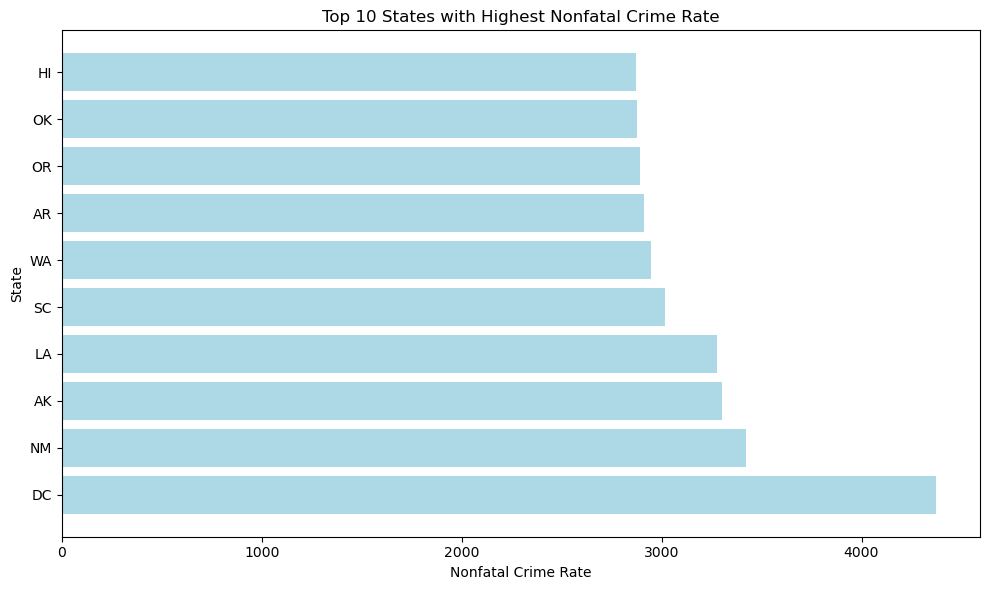

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
# Find the top 10 states with the highest nonfatal crime rate
top10_nonfatal_crime_states = crime_2018.nlargest(10, 'nonfatal crime rate')
# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top10_nonfatal_crime_states['STATE'], top10_nonfatal_crime_states['nonfatal crime rate'], color='lightblue')
plt.xlabel('Nonfatal Crime Rate')
plt.ylabel('State')
plt.title('Top 10 States with Highest Nonfatal Crime Rate')
plt.tight_layout()
plt.show()

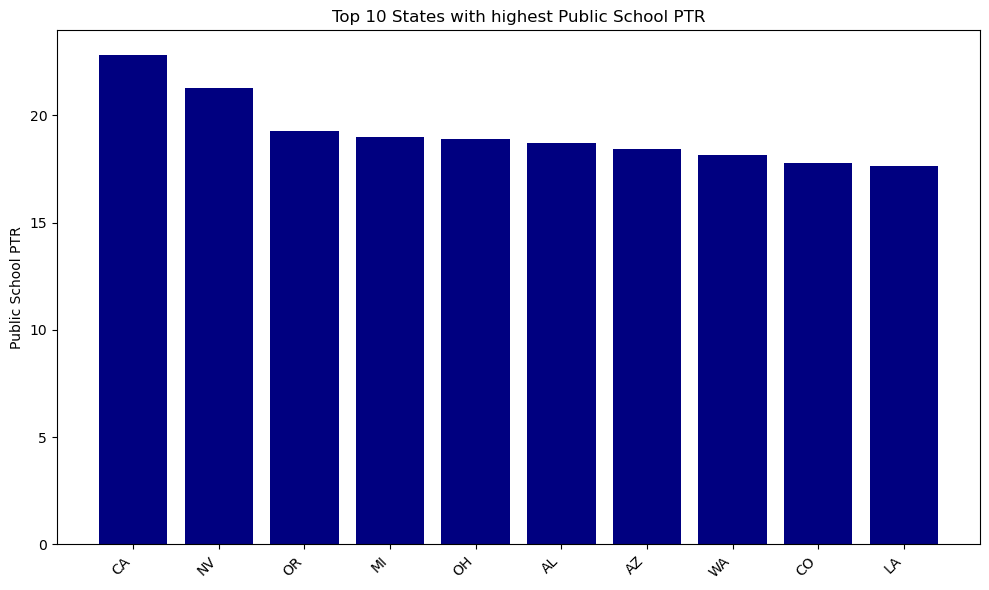

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter out states where Public_PTR is 0
ptr_state_filtered = ptr_state[ptr_state['Public_PTR'] > 0]

# Find the top 10 states with the lowest non-zero public PTR
lowest10_public_ptr_states = ptr_state_filtered.nlargest(10, 'Public_PTR')

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(lowest10_public_ptr_states['STATE'], lowest10_public_ptr_states['Public_PTR'], color='navy')
plt.ylabel('Public School PTR')
plt.title('Top 10 States with highest Public School PTR')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


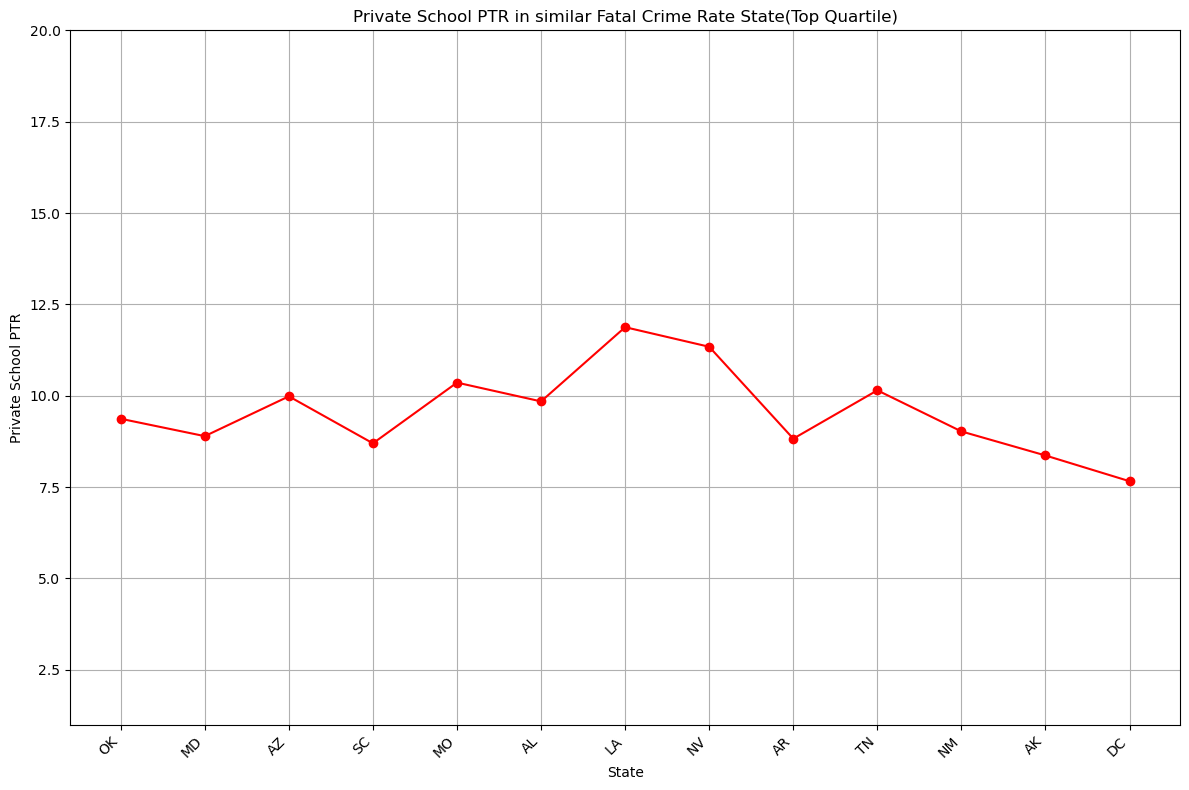

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
# Criteria: States in the top quartile of fatal crime rates, sorted by rate
threshold_fatal = crime_2018['fatal crime rate'].quantile(0.75)
top_fatal_crime_states = crime_2018[crime_2018['fatal crime rate'] >= threshold_fatal].sort_values('fatal crime rate')

# Merge and prepare data
merged_data_fatal_ptr = pd.merge(top_fatal_crime_states, ptr_state[['STATE', 'Private_PTR']], on='STATE')

# Determine the range for Y-axis based on PTR values to enhance visibility
min_ptr, max_ptr = merged_data_fatal_ptr['Private_PTR'].min(), merged_data_fatal_ptr['Private_PTR'].max()
ptr_range = max_ptr - min_ptr
y_min = max(0, min_ptr - ptr_range * 0.1)  # Extend lower limit by 10% of range if not negative
y_max = max_ptr + ptr_range * 0.1  # Extend upper limit by 10% of range

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(merged_data_fatal_ptr['STATE'], merged_data_fatal_ptr['Private_PTR'], marker='o', linestyle='-', color='red')
plt.xlabel('State')
plt.ylabel('Private School PTR')
plt.title('Private School PTR in similar Fatal Crime Rate State(Top Quartile)')
plt.xticks(rotation=45, ha="right")
plt.grid(True)
plt.ylim(1, 20)  # Adjust y-axis to make PTR differences more visible
plt.tight_layout()
plt.show()

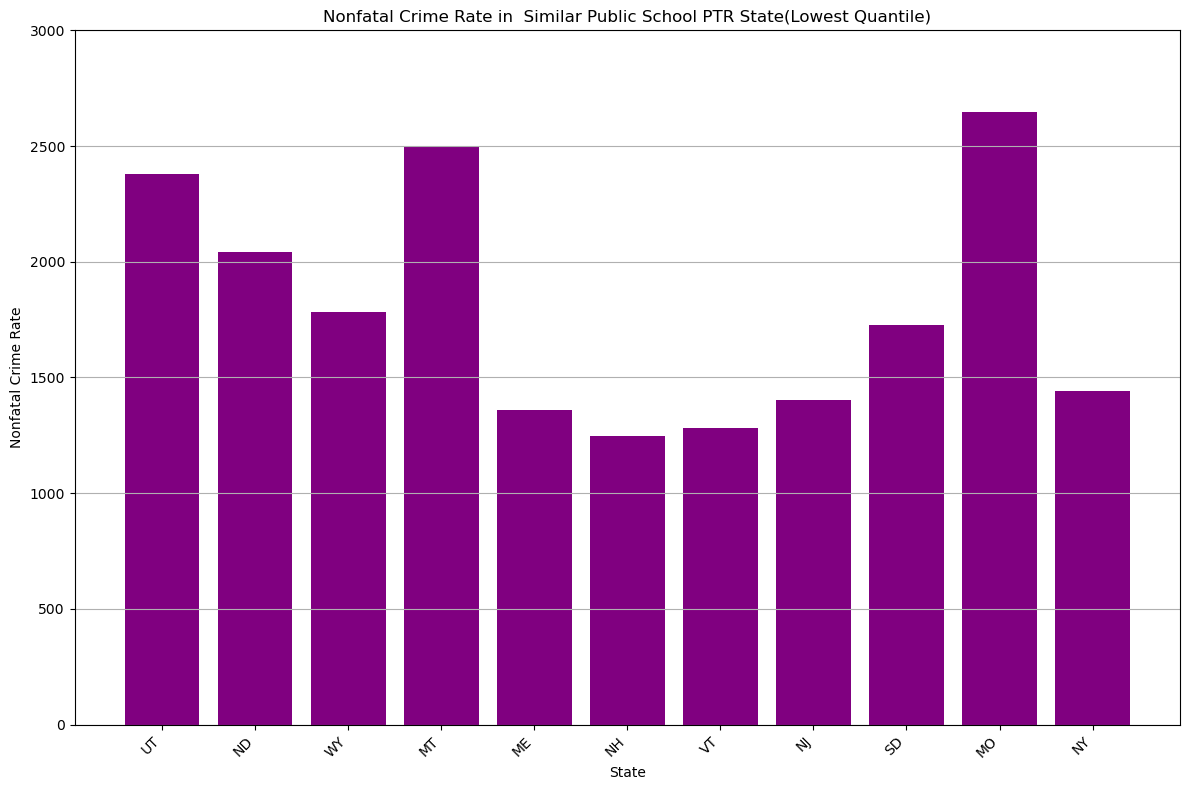

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Identify states in the lowest quantile (25%) of public PTR
threshold_ptr_public = ptr_state['Public_PTR'].quantile(0.25)
low_ptr_public_states = ptr_state[ptr_state['Public_PTR'] <= threshold_ptr_public]
# Step 2: Merge the low public PTR data with crime_2019 data on the state
merged_data_low_public_ptr_crime = pd.merge(low_ptr_public_states, crime_2018[['STATE', 'nonfatal crime rate']], on='STATE').sort_values('Public_PTR')

# Plotting - Bar plot for Nonfatal Crime Rate in States with Lowest Public School PTR
plt.figure(figsize=(12, 8))
plt.bar(merged_data_low_public_ptr_crime['STATE'], merged_data_low_public_ptr_crime['nonfatal crime rate'], color='purple')
plt.xlabel('State')
plt.ylabel('Nonfatal Crime Rate')
plt.title('Nonfatal Crime Rate in  Similar Public School PTR State(Lowest Quantile)')
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y')
plt.ylim(0, 3000)
plt.tight_layout()
plt.show()


# Project Two

## Main Message

#### The relationship between school and crime: worse school quality with higher crime rate, vice verse.

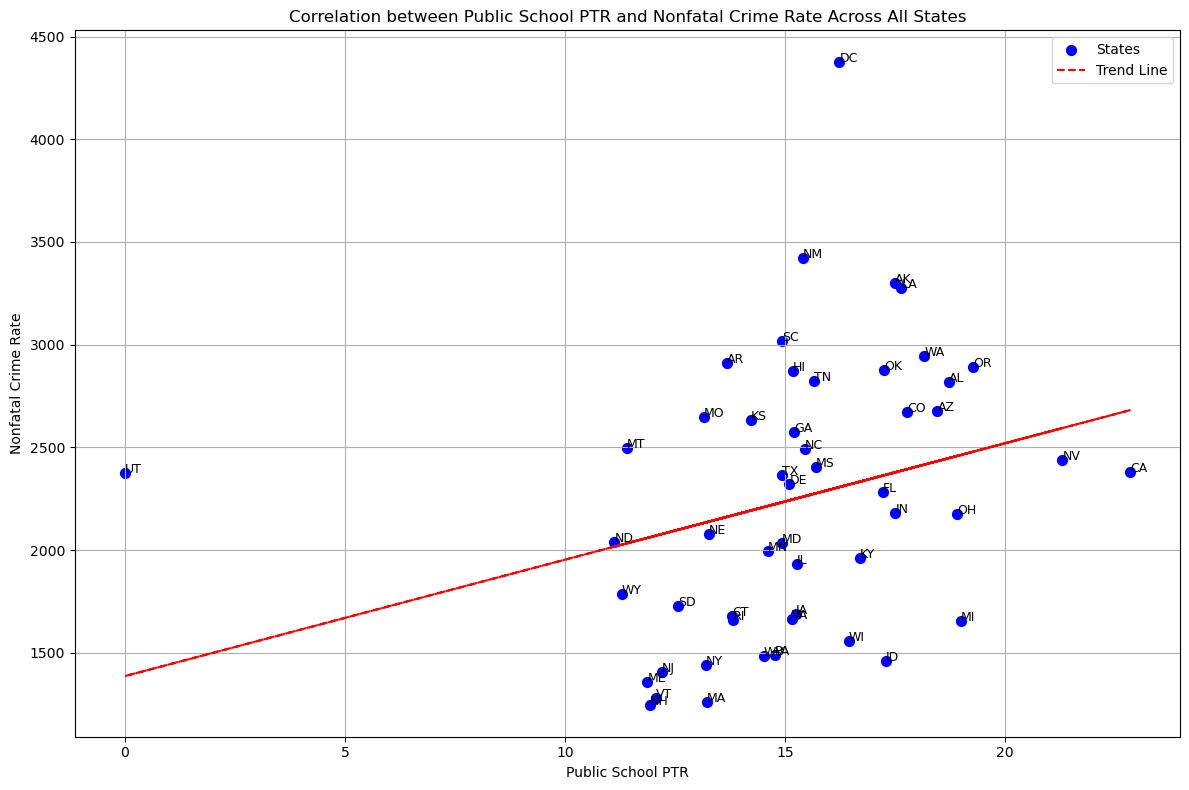

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Merge the PTR data with crime data on "STATE"
merged_data = pd.merge(ptr_state[['STATE', 'Public_PTR']], crime_2018[['STATE', 'nonfatal crime rate']], on='STATE')

# Plotting
plt.figure(figsize=(12, 8))
plt.scatter(
    merged_data['Public_PTR'],
    merged_data['nonfatal crime rate'],
    color='blue', s=50, label='States'
)
# Add "STATE" annotations next to each point
for idx, row in merged_data.iterrows():
    plt.text(
        row['Public_PTR'], 
        row['nonfatal crime rate'], 
        row['STATE'], fontsize=9
    )
# Optional: Calculate and plot the trend line
z = np.polyfit(
    merged_data['Public_PTR'],
    merged_data['nonfatal crime rate'], 1
)
p = np.poly1d(z)
plt.plot(
    merged_data['Public_PTR'],
    p(merged_data['Public_PTR']),
    "r--", label='Trend Line'
)
plt.title('Correlation between Public School PTR and Nonfatal Crime Rate Across All States')
plt.xlabel('Public School PTR')
plt.ylabel('Nonfatal Crime Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()  # Ensure a clean layout
plt.show()


The plot above illustrates the relationship between the condition of public schools and the nonfatal crime rate in various states, with each state represented by a blue dot. It charts the quality of public schools on X axis and the nonfatal crime rate on Y axis, allowing us to trace a trend line through these points. Observing that the slope of the trend line is upward indicates a clear pattern: states with lower-quality public schools tend to have higher nonfatal crime rates. This visual evidence supports the main message of my analysis, suggesting a link between the quality of education and crime rates across the states.

## Maps and Interpretations

In [14]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd


# Merge the data on the 'STATE' column
merged_data = ptr_state.merge(crime_2018, on='STATE')

# Calculate the new value columns based on PTR and crime rates
merged_data['value 1(public PTR / fatal crime)'] = merged_data['Public_PTR'] / merged_data['fatal crime rate']
merged_data['value 2(public PTR / nonfatal crime)'] = merged_data['Public_PTR'] / merged_data['nonfatal crime rate']
merged_data['value 3(private PTR / fatal crime)'] = merged_data['Private_PTR'] / merged_data['fatal crime rate']
merged_data['value 4(private PTR / nonfatal crime)'] = merged_data['Private_PTR'] / merged_data['nonfatal crime rate']

# Prepare the final table for mapping
final_table = merged_data[['STATE', 'value 1(public PTR / fatal crime)', 'value 2(public PTR / nonfatal crime)', \
'value 3(private PTR / fatal crime)', 'value 4(private PTR / nonfatal crime)']]

final_table.head()

,STATE,value 1(public PTR / fatal crime),value 2(public PTR / nonfatal crime),value 3(private PTR / fatal crime),value 4(private PTR / nonfatal crime)
0,AK,0.019759,0.005298,0.009453,0.002535
1,AL,0.036021,0.006644,0.018948,0.003495
2,AR,0.025145,0.004692,0.016235,0.003030
3,AZ,0.038869,0.006896,0.021024,0.003730
4,CA,0.051024,0.009590,0.023879,0.004488


### <span style="color:red">Interpretation for all following maps:
    
The table above, I've created a ratio called 'value' by dividing the proportion of schools by the proportion of crime, based on data from each town. This approach is designed to quantify the relationship between the number of schools and the crime rate within each town. Our hypothesis suggests that a higher population per school correlates with a higher crime rate, and vice versa. Essentially, if a state's 'value'—derived from this calculation—is close to the median value across all states, it supports our assumption.

For instance, consider two hypothetical states, 'A' and 'B'. In state 'A', both a high population per school and a high crime rate, say 99 for both, would result in a 'value' of 1 (99 divided by 99). Similarly, in state 'B', a low population per school and a low crime rate, both being 1, would also lead to a 'value' of 1 (1 divided by 1).

To visually represent this data, I created four maps, coloring each state based on how its 'value' compares to the median. States with values close to the median are colored navy, indicating a direct correlation between school populations and crime rates as per our hypothesis. States that deviate more significantly from the median are marked in red or yellow. The prevalence of navy across all maps further validates our initial hypothesis, showing a significant correlation between the proportion of population per school and crime rates.


In [15]:
# Load US States shapefile
state_map = gpd.read_file('tl_2019_us_state.shp')

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


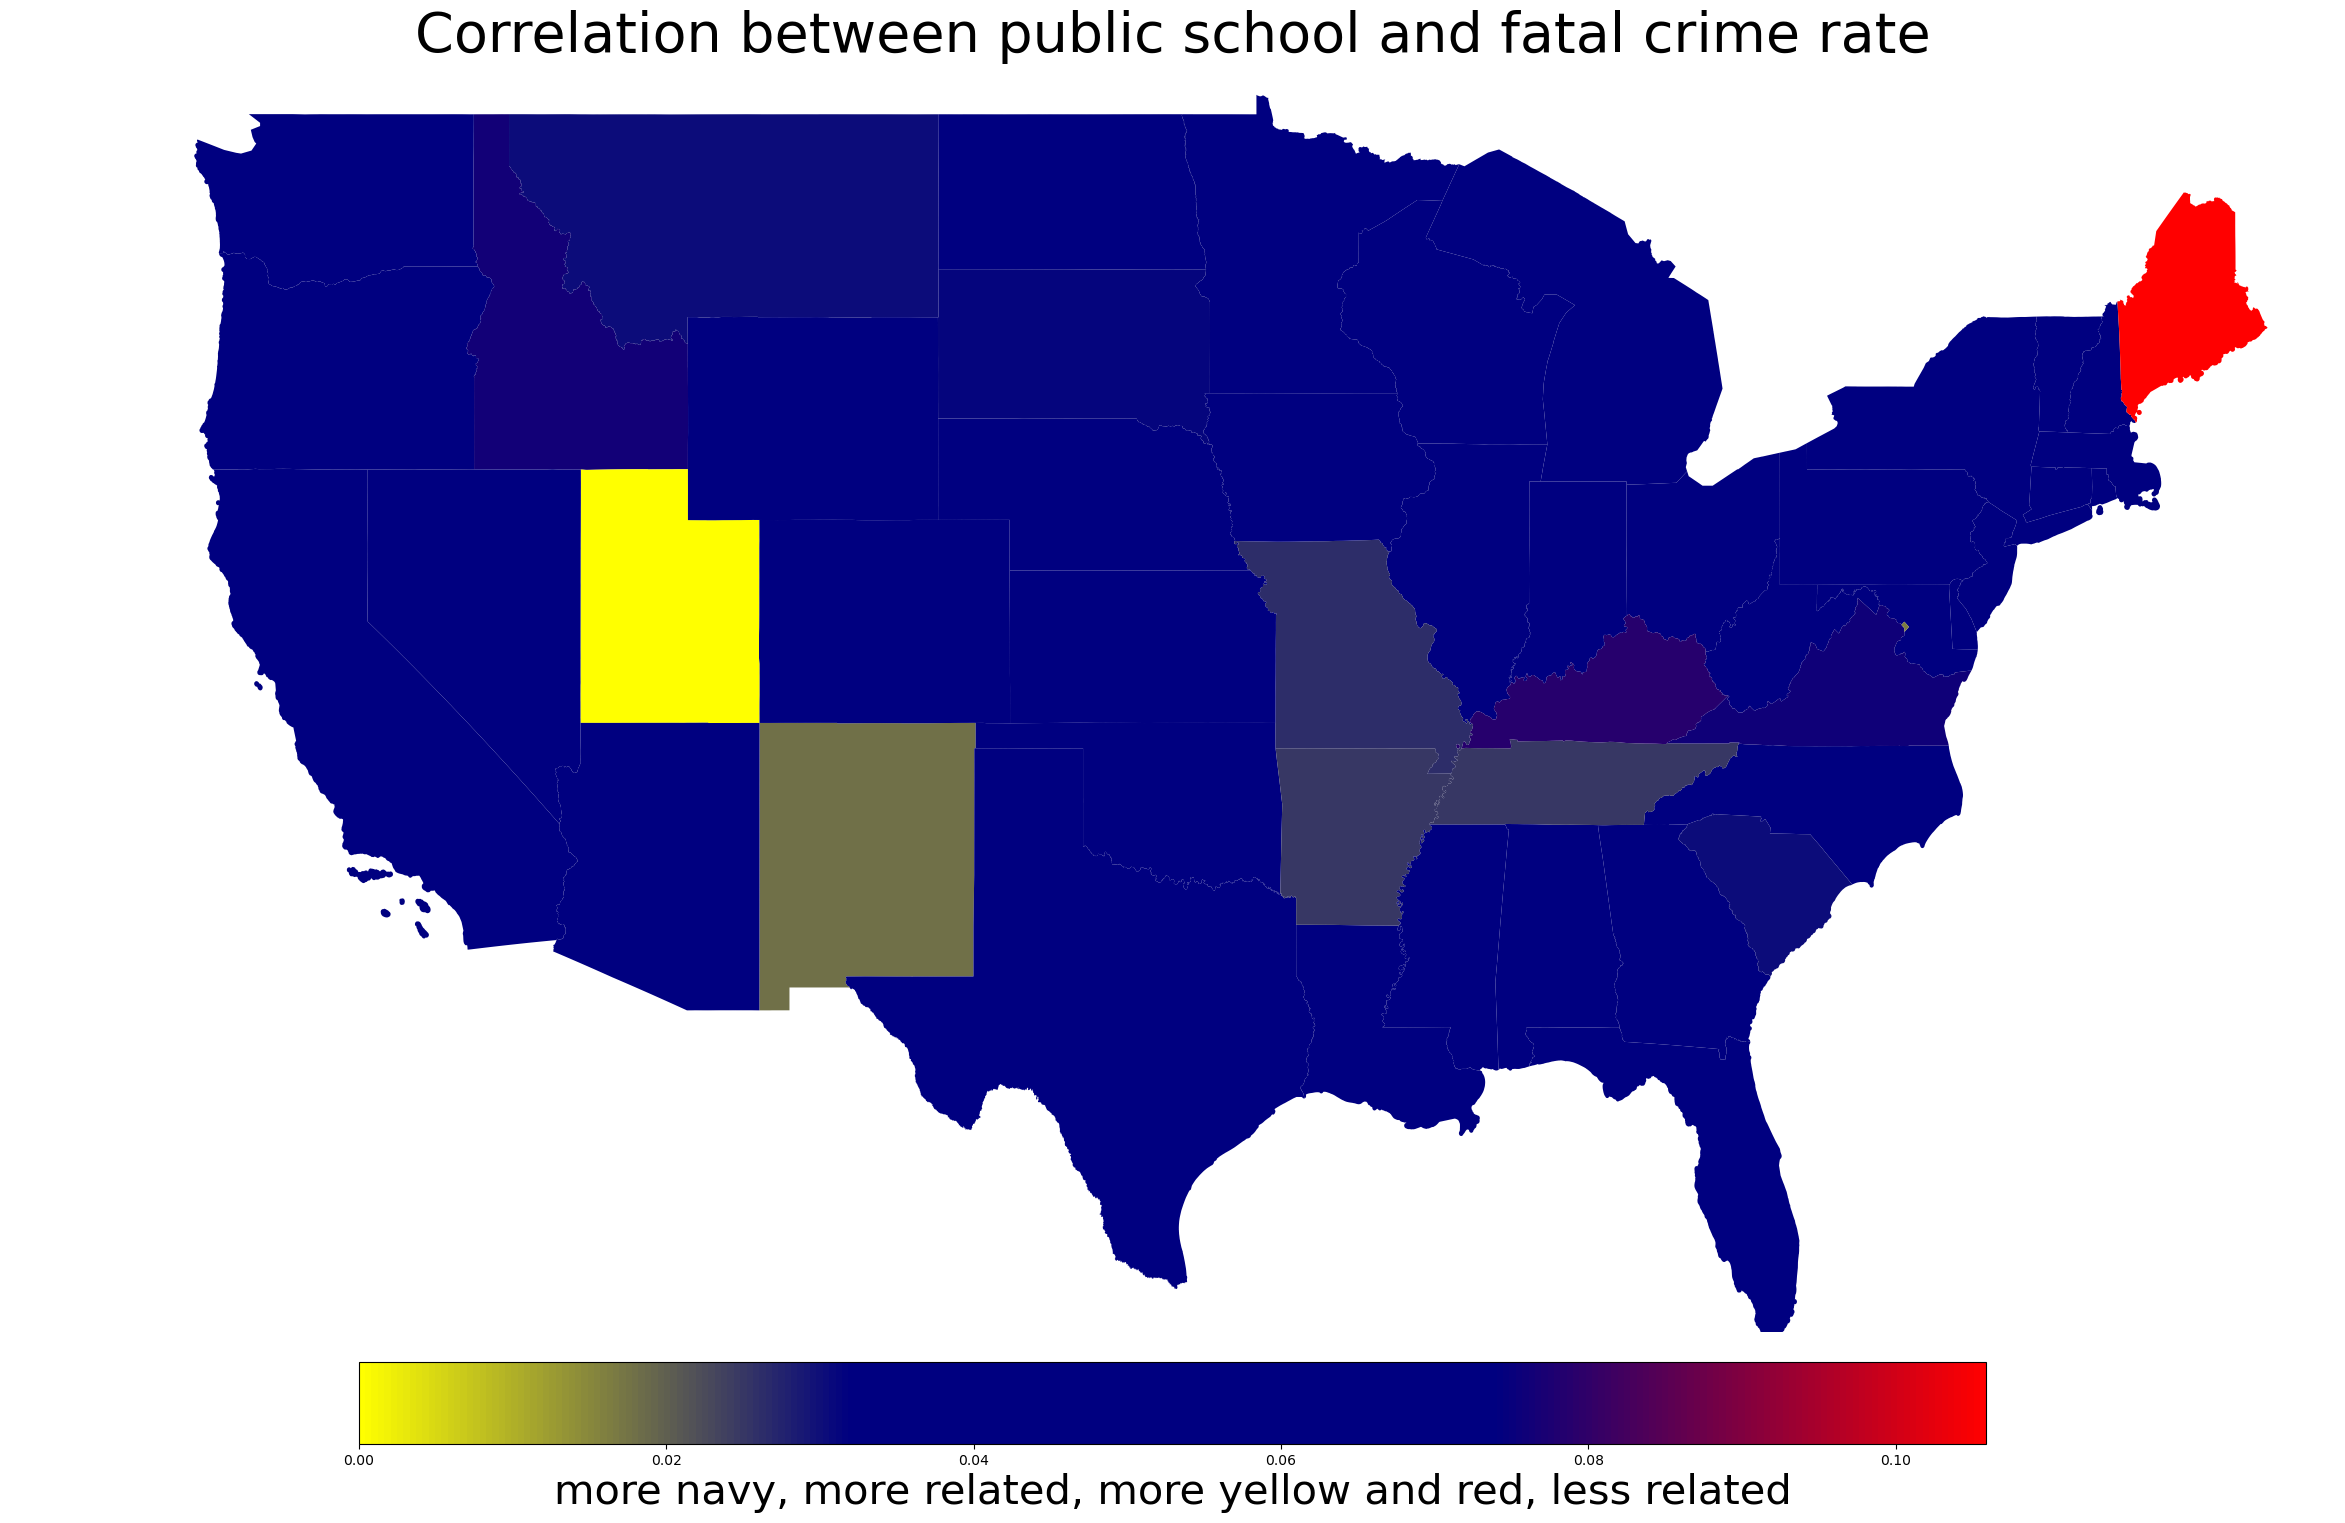

In [16]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as colors

# Merge the dataframes
map_data_merged = state_map.merge(final_table, left_on='STUSPS', right_on='STATE')

cmap = colors.LinearSegmentedColormap.from_list(
    'custom_colormap', 
    [(0, 'yellow'), (0.3, 'navy'), (0.7, 'navy'), (1, 'red')], N=256
)
# Plot the map with a larger size
fig, ax = plt.subplots(1, figsize=(30, 20))
# Use the custom colormap
plot = map_data_merged.plot(column='value 1(public PTR / fatal crime)', ax=ax, cmap=cmap)
# Set the x and y axis limits to focus on the contiguous United States
ax.set_xlim([-130, -65])
ax.set_ylim([25, 50])
# Creating the colorbar using the figure and the plot object
# Increase the size of the colorbar
cbar = fig.colorbar(plot.get_children()[0], ax=ax, orientation='horizontal', shrink=0.7, aspect=20, pad=0.02)
cbar.set_label('more navy, more related, more yellow and red, less related', fontsize=30)
# Set the axis off
ax.set_axis_off()
# Set a title with a larger font size
plt.title('Correlation between public school and fatal crime rate', fontsize=40)
# Show the plot
plt.show()

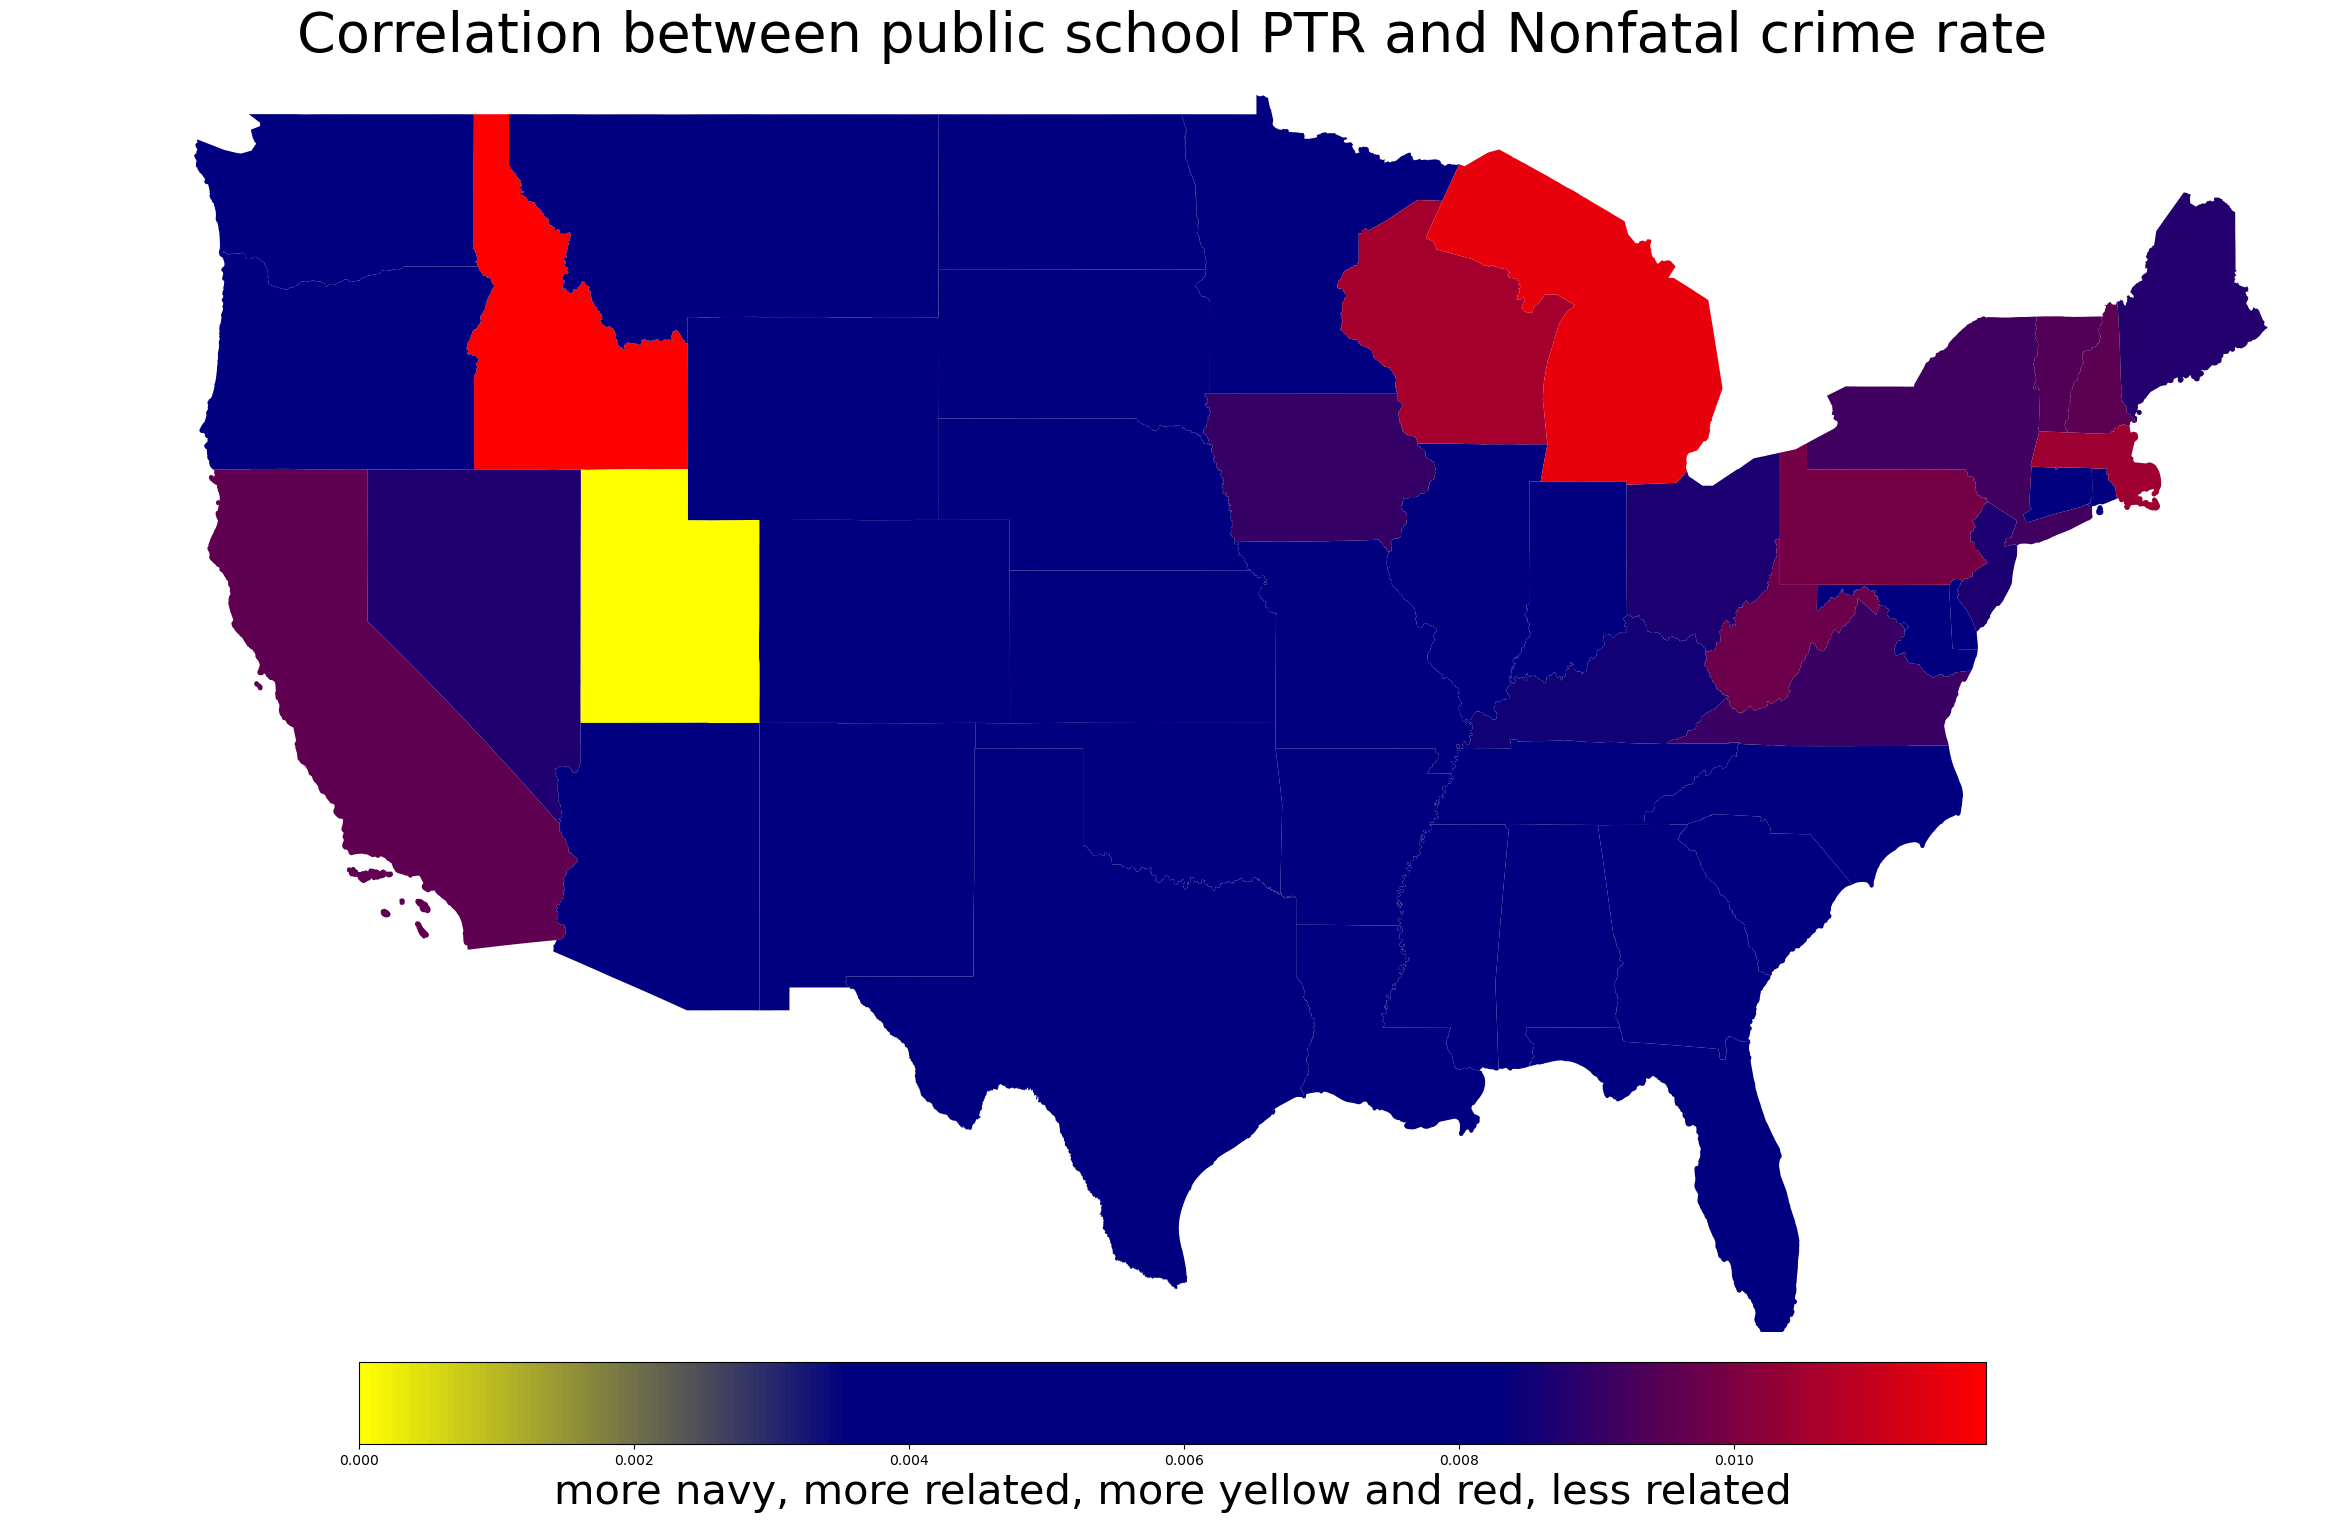

In [17]:
# Plot the map with a larger size
fig, ax = plt.subplots(1, figsize=(30, 20))
# Use the custom colormap
plot = map_data_merged.plot(column='value 2(public PTR / nonfatal crime)', ax=ax, cmap=cmap)
# Set the x and y axis limits to focus on the contiguous United States
ax.set_xlim([-130, -65])
ax.set_ylim([25, 50])
# Creating the colorbar using the figure and the plot object
# Increase the size of the colorbar
cbar = fig.colorbar(plot.get_children()[0], ax=ax, orientation='horizontal', shrink=0.7, aspect=20, pad=0.02)
cbar.set_label('more navy, more related, more yellow and red, less related', fontsize=30)
# Set the axis off
ax.set_axis_off()
# Set a title with a larger font size
plt.title('Correlation between public school PTR and Nonfatal crime rate', fontsize=40)
# Show the plot
plt.show()

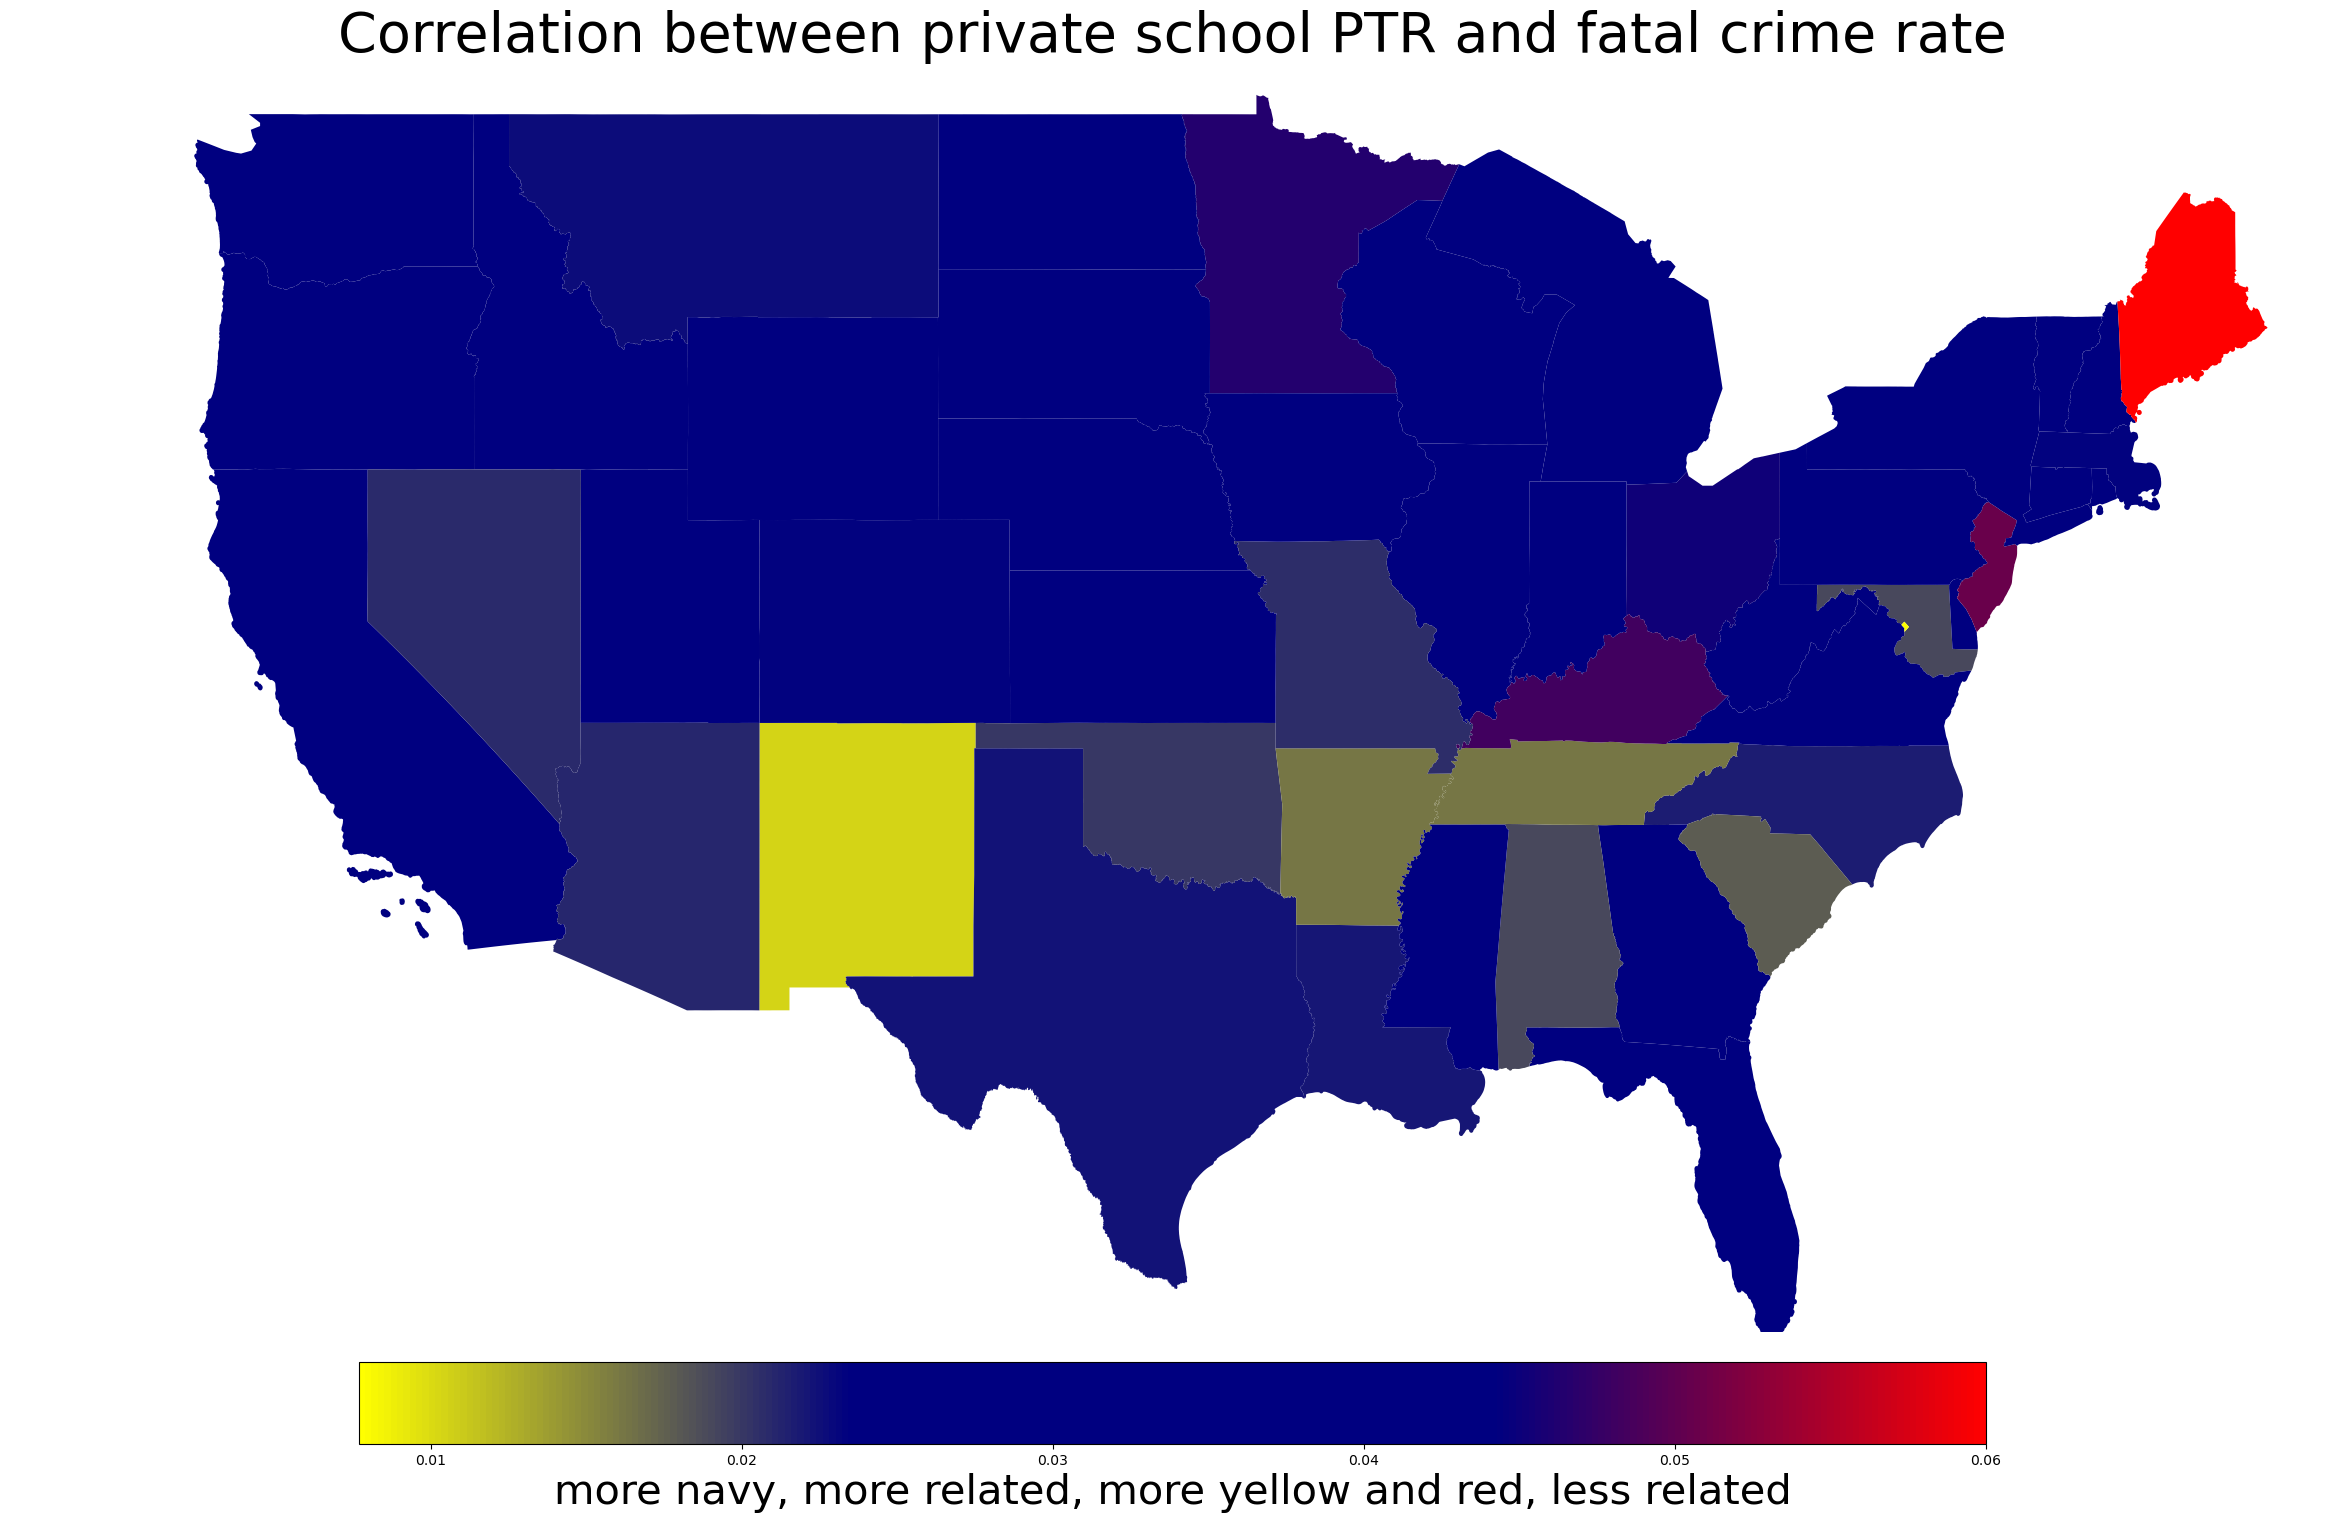

In [18]:
# Plot the map with a larger size
fig, ax = plt.subplots(1, figsize=(30, 20))
# Use the custom colormap
plot = map_data_merged.plot(column='value 3(private PTR / fatal crime)', ax=ax, cmap=cmap)
# Set the x and y axis limits to focus on the contiguous United States
ax.set_xlim([-130, -65])
ax.set_ylim([25, 50])
# Creating the colorbar using the figure and the plot object
# Increase the size of the colorbar
cbar = fig.colorbar(plot.get_children()[0], ax=ax, orientation='horizontal', shrink=0.7, aspect=20, pad=0.02)
cbar.set_label('more navy, more related, more yellow and red, less related', fontsize=30)
# Set the axis off
ax.set_axis_off()
# Set a title with a larger font size
plt.title('Correlation between private school PTR and fatal crime rate', fontsize=40)
# Show the plot
plt.show()

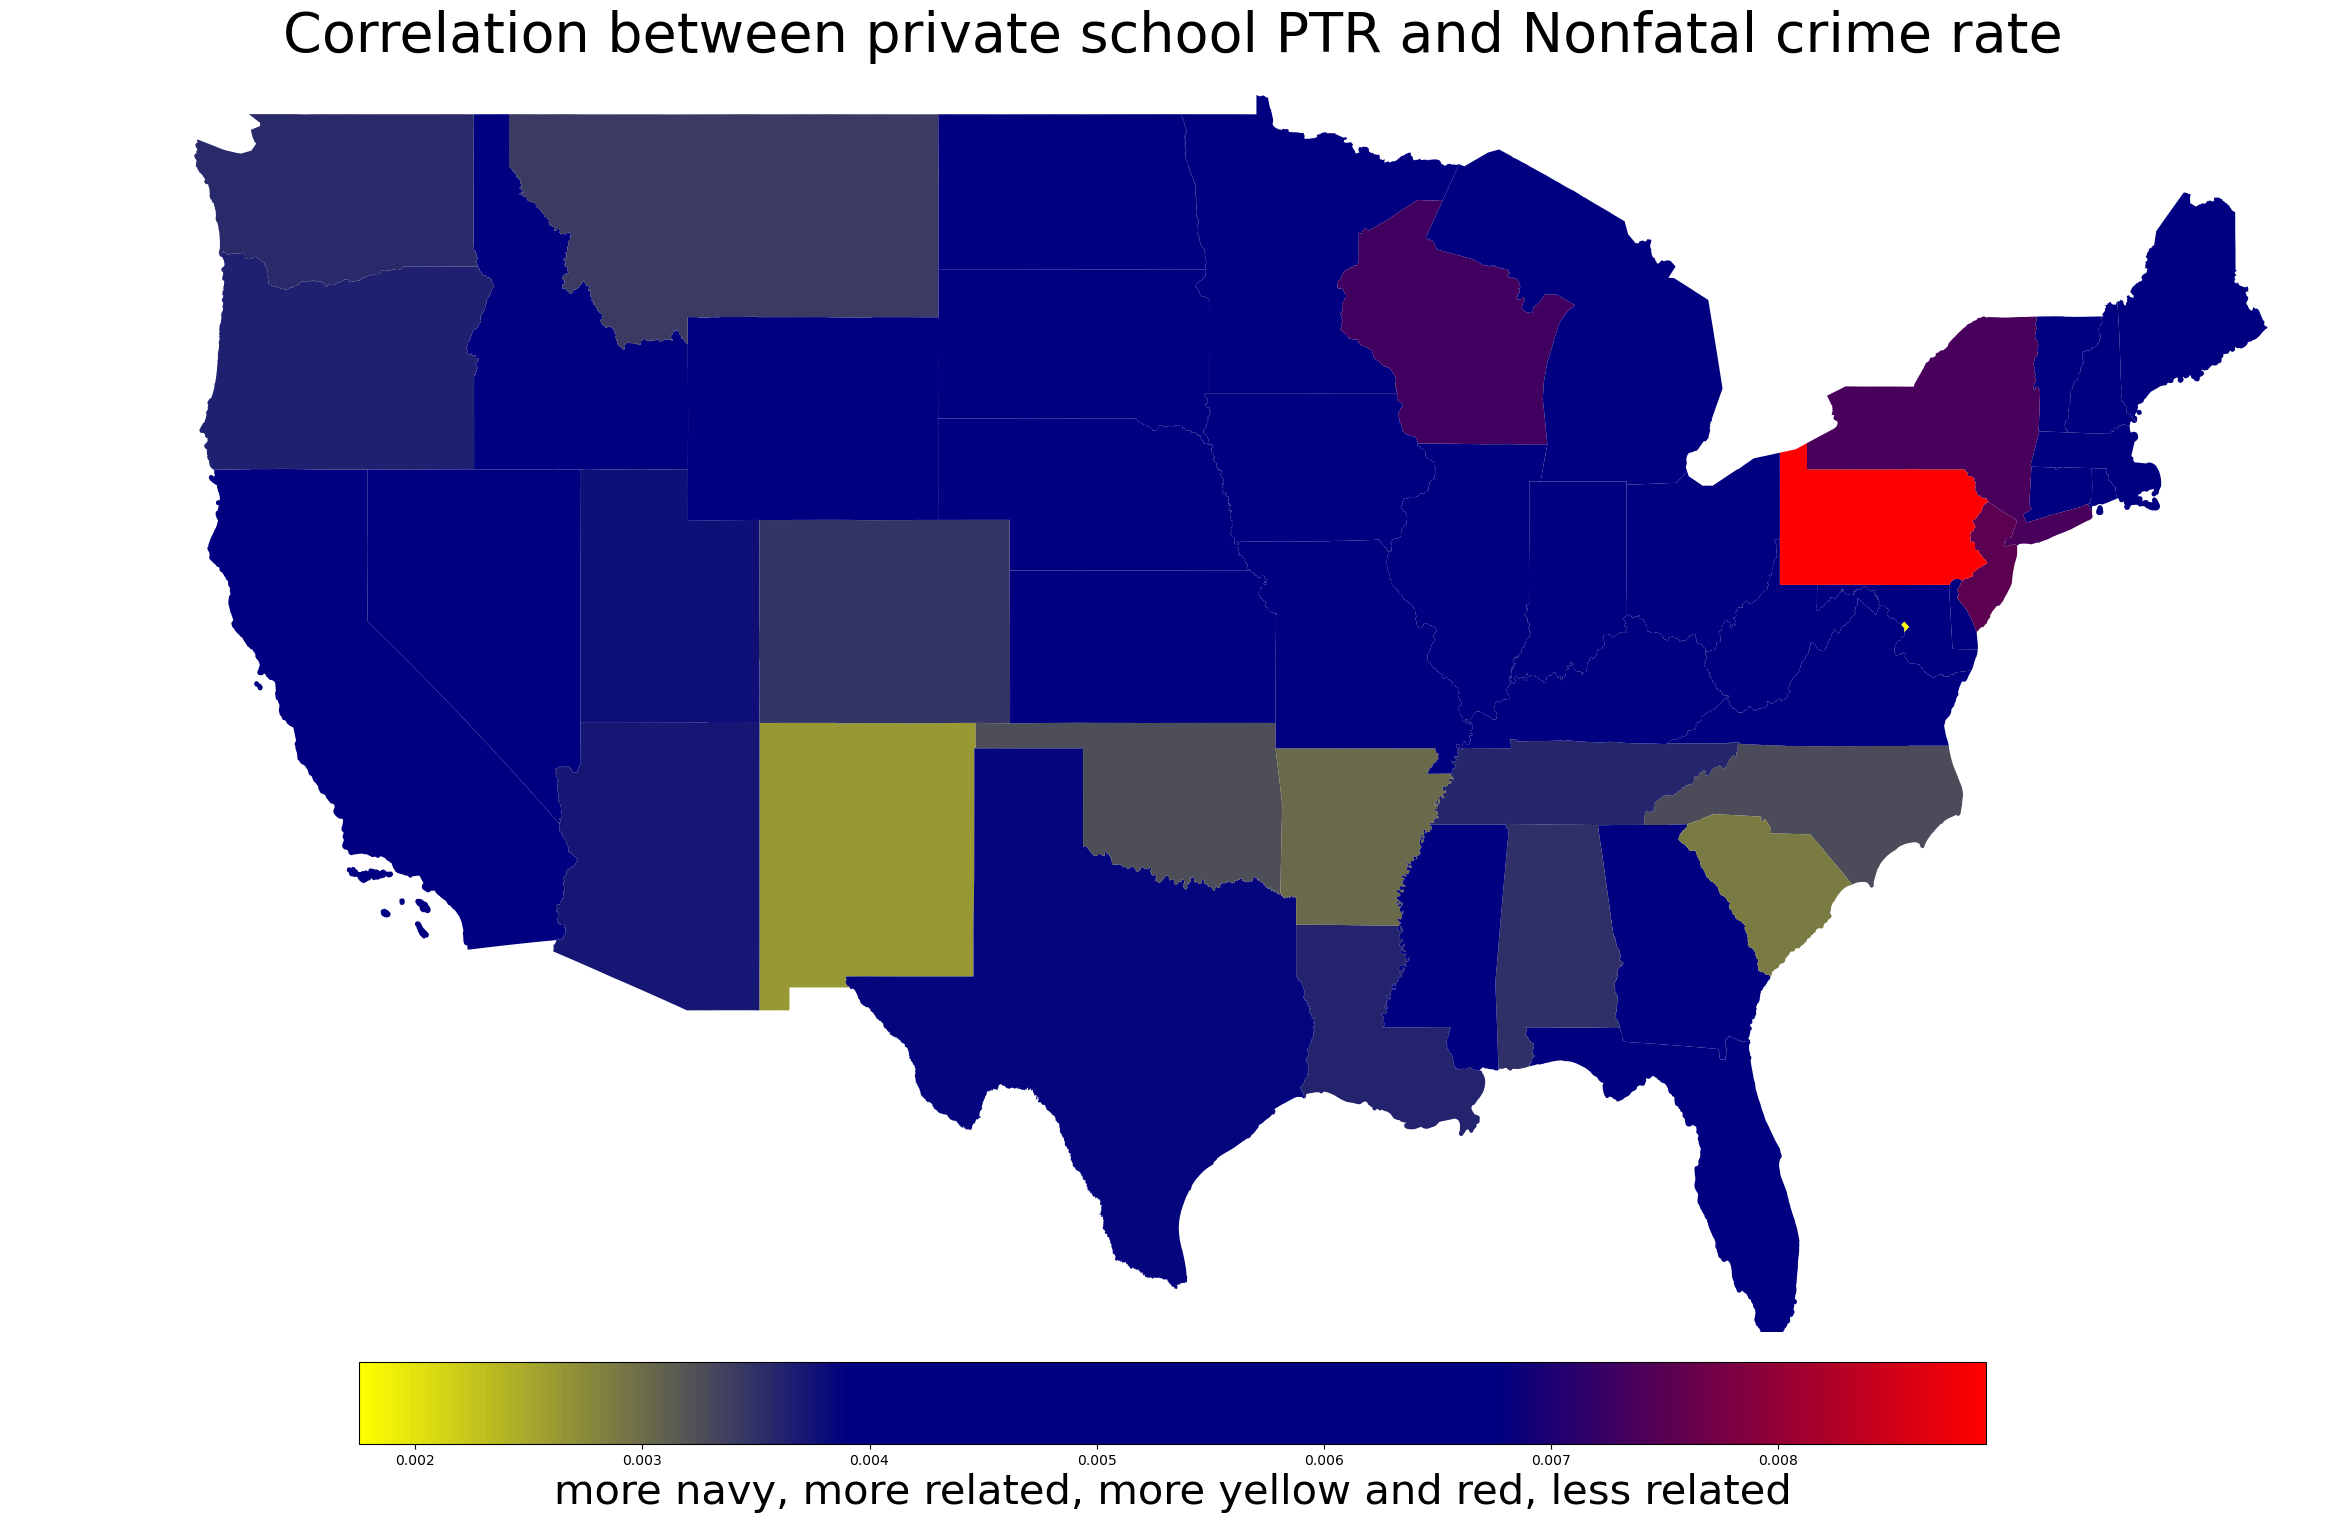

In [19]:
# Plot the map with a larger size
fig, ax = plt.subplots(1, figsize=(30, 20))
# Use the custom colormap
plot = map_data_merged.plot(column='value 4(private PTR / nonfatal crime)', ax=ax, cmap=cmap)
# Set the x and y axis limits to focus on the contiguous United States
ax.set_xlim([-130, -65])
ax.set_ylim([25, 50])
# Creating the colorbar using the figure and the plot object
# Increase the size of the colorbar
cbar = fig.colorbar(plot.get_children()[0], ax=ax, orientation='horizontal', shrink=0.7, aspect=20, pad=0.02)
cbar.set_label('more navy, more related, more yellow and red, less related', fontsize=30)
# Set the axis off
ax.set_axis_off()
# Set a title with a larger font size
plt.title('Correlation between private school PTR and Nonfatal crime rate', fontsize=40)
# Show the plot
plt.show()

# Project Three

## Potential Data to Scrape

#### Exploring the Potential Data Scraped for Research on School Quality and Crime Rates

In the course of my research, I've concentrated on how the number of students per school can serve as an indicator of a school's quality in each state. An interesting angle I considered was whether the financial investment in students, specifically the average spending per student (K-12 spending), could also reflect the quality of education provided by the schools in different states. This approach led me to utilize data on the average expenditure per student across states as a potential measure of school quality.

#### The address I can scrape from

The primary source of this data comes from a website recommended by the professor. Despite being a practice site, I found the data there to be incredibly relevant and useful for my research objectives. This site provided detailed figures on K-12 spending per student, which I believe is a significant indicator of educational quality.

#### Merging Data and Utilizing New Information for Research

The main purpose of my research explores the relationship between the quality of education (as indicated by K-12 spending) and the crime rates in various states. I aim to correlate the investment in education per student with crime statistics

## Potential Challenges

#### Challenges Faced in Web Scraping

When undertaking a web scraping project, one of the primary challenges encountered is the vast amount of data present on websites. The difficulty often lies in identifying and isolating the specific subset of data needed for a particular analysis. This task requires precise targeting to ensure the relevant data is captured without extraneous information. A notable challenge is the extraction of accurate and useful data, as websites contain a mix of relevant and irrelevant information.

For my project, I aimed to scrape data pertaining to K-12 spending by state in the United States. This information is crucial as it provides insights into the educational quality across different states, serving as a valuable resource for my research. The process involves discerning the specific data required amidst a sea of available information on the internet.

#### Running the Program Over Time

Yes, it is necessary to run the scraping program multiple times. This iterative process allows for refining the data collection methods to ensure accuracy and relevance of the captured data. The data is then utilized to create visual representations, facilitating a clearer understanding of the educational spending patterns across states. Adjustments and revisions are often required to align the collected data with the research objectives.

#### Data Source Scraping Feasibility

For this project, state-level data within the USA was chosen as the primary focus due to its accessibility compared to more granular data like county or zip code information. State data is more readily available and can be effectively used for comprehensive analysis and data visualization. This strategic choice simplifies the data collection process, making it feasible to scrape the necessary information for the project.


## Scraping Data from a Website

I web scrape data 

https://en.wikipedia.org/wiki/List_of_United_States_counties_by_per_capita_income

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# The URL of the Wikipedia page to scrape
url = 'https://en.wikipedia.org/wiki/List_of_United_States_counties_by_per_capita_income'

# Perform the GET request to fetch the webpage content
response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})

In [2]:
# Check if the request was successful
if response.status_code == 200:
    # Parse the content using BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')
    table = soup.find('table', {'class': 'wikitable'})

    # Initialize a list to store the extracted data
    income_data = []
    # Iterate over the rows of the table, if found
    if table:
        rows = table.find_all('tr')        
        # Define a function to clean and extract the table cell text
        def get_cell_text(cell):
            return cell.get_text(strip=True).replace(u'\u2013', '-')
        for row in rows[1:]:  # Skipping the header row
            cols = row.find_all('td')
            if cols:
                county_or_equivalent = get_cell_text(cols[0])
                state = get_cell_text(cols[1])
                per_capita_income = get_cell_text(cols[2])
                median_household_income = get_cell_text(cols[3])
                income_data.append({
                    'COUNTY': county_or_equivalent,
                    'STATE' : state,
                    'per capita income': per_capita_income,
                    'median household income': median_household_income,
                })
    # Convert the list of dictionaries to a DataFrame
    income_df = pd.DataFrame(income_data)
    output = income_df
output.head()

,COUNTY,STATE,per capita income,median household income
0,New York County,New York,"$76,592","$69,659"
1,Arlington,Virginia,"$62,018","$103,208"
2,Falls Church City,Virginia,"$59,088","$120,000"
3,Marin,California,"$56,791","$90,839"
4,Santa Clara,California,"$56,248","$124,055"


In [3]:
# clean this data
import pandas as pd
state_abbreviations = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY',
    'District of Columbia': 'DC', 'American Samoa': 'AS', 'Guam': 'GU',
    'Northern Mariana Islands': 'MP', 'Puerto Rico': 'PR', 'U.S. Virgin Islands': 'VI'
}
output['STATE'] = output['STATE'].map(state_abbreviations)
output['COUNTY'] = output['COUNTY'].str.replace(' County| City', '', regex=True)
output['COUNTY'] = output['COUNTY'].str.strip()
output['COUNTY'] = output['COUNTY'].str.upper()
# remove $
output['per capita income'] = output['per capita income'].str.replace('$', '').str.replace(',', '').str.strip()
output['median household income'] = output['median household income'].str.replace('$', '').str.replace(',', '').str.strip()
# Step 2: Convert the column to a numeric type
output['per capita income'] = pd.to_numeric(output['per capita income'])
output['median household income'] = pd.to_numeric(output['median household income'])

output.head()

,COUNTY,STATE,per capita income,median household income
0,NEW YORK,NY,76592,69659
1,ARLINGTON,VA,62018,103208
2,FALLS CHURCH,VA,59088,120000
3,MARIN,CA,56791,90839
4,SANTA CLARA,CA,56248,124055


In [33]:
# save data to csv file， prevent web pages from being out of service
# output.to_csv('income_data.csv', index=False)

## Visualizing the Scraped Dataset

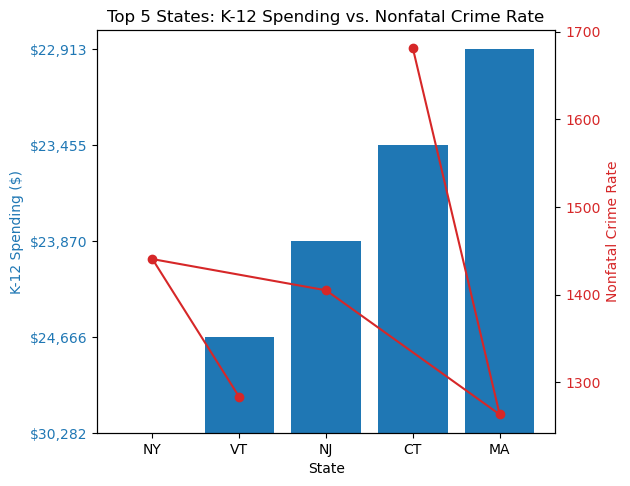

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
# Assuming 'crime_2018' is a large dataset with a 'nonfatal crime rate' column and 'State' column
# First, we need to extract the states from the 'education_spending_df' dataframe
states_to_use = education_spending_df['State'].head().tolist()

# Now, let's filter the 'crime_2018' dataframe to only include these states
# For demonstration purposes, we simulate this by filtering the simulated 'full_crime_2018_df'
crime_2018_filtered = crime_2018[crime_2018['State'].isin(states_to_use)]

# Now, let's create the plot with the filtered crime data and the top 5 educational spending data
fig, ax1 = plt.subplots()

ax1.set_xlabel('State')
ax1.set_ylabel('K-12 Spending ($)', color='tab:blue')
ax1.bar(education_spending_df.head()['State'], education_spending_df.head()['K-12 Spending'], color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Nonfatal Crime Rate', color='tab:red')
ax2.plot(crime_2018_filtered['State'], crime_2018_filtered['nonfatal crime rate'], color='tab:red', marker='o')
ax2.tick_params(axis='y', labelcolor='tab:red')
fig.tight_layout()

# Show the plot with the title
plt.title('Top 5 States: K-12 Spending vs. Nonfatal Crime Rate')
plt.show()


You can see the trend of each state, crime and spending. 

## Adding a New Dataset

I merge unemployment rate by county level. 

https://www.kaggle.com/datasets/carlosaguayo/2018-unemployment-rate-by-county

crime rate by county level 

https://www.kaggle.com/datasets/mikejohnsonjr/united-states-crime-rates-by-county

In [16]:
crime_rate = pd.read_csv('crime_data.csv')
# Process the dataframe
crime_rate['COUNTY'], crime_rate['STATE'] = crime_rate['county_name'].str.split(',').str[0], crime_rate['county_name'].str.split(',').str[1]
crime_rate['COUNTY'] = crime_rate['COUNTY'].apply(lambda x: ' '.join(x.split()[:-1]))
crime_rate['COUNTY'] = crime_rate['COUNTY'].str.upper()
# Rename 'crime_rate_per_100000' to 'county crime rate' and drop the 'county_name' column
crime_rate.rename(columns={'crime_rate_per_100000': 'county crime rate'}, inplace=True)
crime_rate.drop(columns=['county_name'], inplace=True)
# Filter for 'county crime rate' greater than 0
crime_rate = crime_rate[crime_rate['county crime rate'] > 0]
# Ensure no other columns are included
crime_rate = crime_rate[['STATE','COUNTY', 'county crime rate']]
crime_rate['STATE'] = crime_rate['STATE'].str.strip()
crime_rate['COUNTY'] = crime_rate['COUNTY'].str.strip()
# Display the first few rows
crime_rate.head()

,STATE,COUNTY,county crime rate
0,MO,ST. LOUIS,1791.995377
1,AR,CRITTENDEN,1754.914968
2,IL,ALEXANDER,1664.700485
3,TX,KENEDY,1456.310680
4,LA,DE SOTO,1447.402430


In [5]:
unemployment_rate = pd.read_csv('unemployment rate.csv')
# Split 'Region Name' into 'COUNTY' and 'STATE', then process these columns
unemployment_rate['COUNTY'], unemployment_rate['STATE'] = unemployment_rate['Region Name'].str.split(',').str[0], unemployment_rate['Region Name'].str.split(',').str[1]
unemployment_rate['COUNTY'] = unemployment_rate['COUNTY'].apply(lambda x: ' '.join(x.split()[:-1]))
unemployment_rate['COUNTY'] = unemployment_rate['COUNTY'].str.upper()
unemployment_rate['STATE'] = unemployment_rate['STATE'].str.strip()
# Drop the original 'Region Name' column and rearrange columns
unemployment_rate.drop(columns=['Region Name'], inplace=True)
unemployment_rate = unemployment_rate[unemployment_rate['2018'] > 0]
unemployment_rate = unemployment_rate[['COUNTY', 'STATE', '2018']]
unemployment_rate.rename(columns={'2018': 'unemployment rate'}, inplace=True)
# Display the first few rows of the renamed and processed dataframe
unemployment_rate.head()

,COUNTY,STATE,unemployment rate
0,ABBEVILLE,SC,4.2
1,ACADIA,LA,5.4
2,ACCOMACK,VA,4.1
3,ADA,ID,2.4
4,ADAIR,OK,4.4


In [14]:
import pandas as pd
# Perform the merge on 'COUNTY' and 'STATE'
merged_df = pd.merge(crime_rate, ptr_county, on=['STATE', 'COUNTY'], how = 'inner')
merged = pd.merge(unemployment_rate, merged_df, on=['STATE', 'COUNTY'], how = 'inner')
final_data = pd.merge(merged, output, on=['STATE', 'COUNTY'], how = 'inner')
final_data

,COUNTY,STATE,unemployment rate,county crime rate,Private_PTR,Public_PTR,per capita income,median household income
0,ABBEVILLE,SC,4.2,511.856680,7.850000,13.242189,18134,35947
1,ACADIA,LA,5.4,163.976593,14.490378,20.080976,19910,37587
2,ACCOMACK,VA,4.1,190.056715,11.000000,15.921038,22703,39328
3,ADA,ID,2.4,206.500442,9.621437,18.674659,27452,55210
4,ADAIR,OK,4.4,310.894836,11.150000,12.714123,15116,32556
...,...,...,...,...,...,...,...,...
2984,YUMA,CO,2.0,68.958723,0.000000,16.849689,22498,44308
2985,YUMA,AZ,16.9,346.419749,15.046403,23.850888,18840,41595
2986,ZAPATA,TX,5.4,208.478110,7.000000,16.190318,16671,31109
2987,ZAVALA,TX,9.7,411.319513,7.000000,13.124694,12828,25625


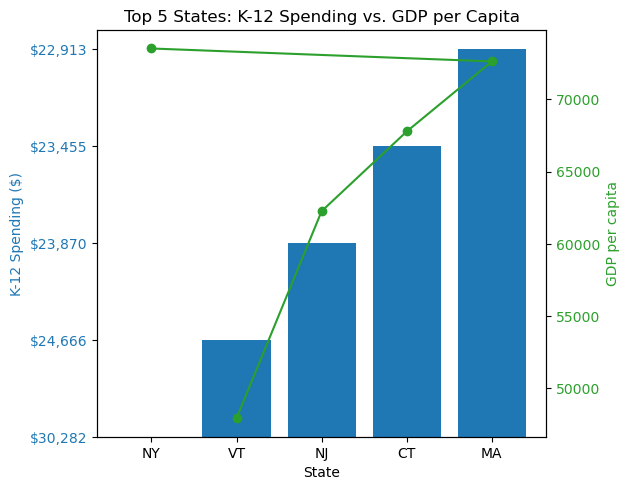

In [21]:
gdp_filtered = gdp[gdp['State'].isin(states_to_use)]
# Now let's create the plot with the filtered GDP data and the top 5 educational spending data
fig, ax1 = plt.subplots()

ax1.set_xlabel('State')
ax1.set_ylabel('K-12 Spending ($)', color='tab:blue')
ax1.bar(education_spending_df.head()['State'], education_spending_df.head()['K-12 Spending'], color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('GDP per capita', color='tab:green')
ax2.plot(gdp_filtered['State'], gdp_filtered['GDP per capita'], color='tab:green', marker='o')
ax2.tick_params(axis='y', labelcolor='tab:green')

fig.tight_layout()

# Show the plot with the title
plt.title('Top 5 States: K-12 Spending vs. GDP per Capita')
plt.show()

You can now compare the state with crime and K_12 spending

In [15]:
import statsmodels.api as sm

# Assuming 'final_data' is your DataFrame and it's already loaded

# Define the independent variables (X) and the dependent variable (Y)
X = final_data[['Public_PTR']]
Y = final_data['unemployment rate']


# Fitting the OLS regression model
model = sm.OLS(Y, X).fit()

# Printing the summary of the regression
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      unemployment rate   R-squared (uncentered):                   0.867
Model:                            OLS   Adj. R-squared (uncentered):              0.867
Method:                 Least Squares   F-statistic:                          1.953e+04
Date:                Sat, 06 Apr 2024   Prob (F-statistic):                        0.00
Time:                        16:56:00   Log-Likelihood:                         -5618.2
No. Observations:                2989   AIC:                                  1.124e+04
Df Residuals:                    2988   BIC:                                  1.124e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Public_PTR     0.2685      0.002    139.767      0.000       0.265       0.272
==============================================================================
Omnibus:                      584.437   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14790.931
Skew:                           0.238   Prob(JB):                         0.00
Kurtosis:                      13.887   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Conclusion

As we wrap up this study, we've journeyed through the complex world of education quality and crime rates across the US, armed with insights and data that go beyond what we typically see. Despite the challenges of not having all the data we wished for, focusing on states has led us to discover important patterns and connections, enriching our understanding of the ties between public safety and education(McCall et al., 2012).

Through the meticulous juxtaposition of crime rates with factors like school types, student-to-school ratios, and economic indicators, a comprehensive narrative has emerged. It speaks to the profound impact of educational environments and investments on societal welfare. The diligent application of web scraping techniques has further enriched our analysis, allowing us to draw from a well of data that sheds light on the financial commitments to education across states.

The visual representations and maps crafted in this study not only illustrate the statistical findings but also tell a story of potential and promise(Murray & Swatt, 2010). They reveal a landscape where the alignment of educational quality with lower crime rates is more than conjecture—it is a visible trend that underscores the importance of nurturing our educational systems.

To sum it up, the data we've collected supports the idea that the quality of education has a real impact on public safety. This study highlights the vital role that investing in education and thoughtful policy-making play in building better communities. Looking ahead, it's crucial for those in charge, from lawmakers to educators and community leaders, to take these insights seriously and work towards enhancing education as a key to a healthier, safer society. This is not the end but rather a stepping stone for more research and efforts to create a more educated and safer world(Ramirez et al., 2011).

### <span style="color:blue">Reference
Burdick-Will, J. (2013). School Violent Crime and Academic Achievement in Chicago. Sociology of Education, 86(4), 343–361. https://doi.org/10.1177/0038040713494225
    
Cook, Philip J., Gottfredson, Denise C., & Na, C. (2010). School Crime Control and Prevention. Crime and Justice, 39(1), 313–440. https://doi.org/10.1086/652387

McCall, P. L., Land, K. C., Dollar, C. B., & Parker, K. F. (2012). The Age Structure-Crime Rate Relationship: Solving a Long-Standing Puzzle. Journal of Quantitative Criminology, 29(2), 167–190. https://doi.org/10.1007/s10940-012-9175-9
 
Murray, R. K., & Swatt, M. L. (2010). Disaggregating the Relationship Between Schools and Crime. Crime & Delinquency, 59(2), 163–190. https://doi.org/10.1177/0011128709348438
    
Ramirez, M., Ferrer, R. R., Cheng, G., Cavanaugh, J. E., & Peek‐Asa, C. (2011). Violation of School Behavioral Policies and Its Relationship with Overall Crime. Annals of Epidemiology, 21(3), 214–220. https://doi.org/10.1016/j.annepidem.2010.06.010